In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neural_exploration import *
sns.set()

### Bandit settings

In [3]:
T = int(1e3)
n_arms = 4
n_features = 16
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 2

SEED = 42
np.random.seed(SEED)

### Neural network settings - deep narrow NN

In [4]:
p = 0.2
hidden_size = 20
n_layer = 10
epochs = 100
train_every = 10
confidence_scaling_factor = 1.0
use_cuda = False

### NeuralUCB on linear rewards - h1

In [5]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 10*np.dot(a, x)

In [6]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      n_layers=n_layer,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████████████████████████████| 1000/1000 [04:44<00:00,  4.70it/s, total regret=1.98e+3, % optimal arm=36.30%]


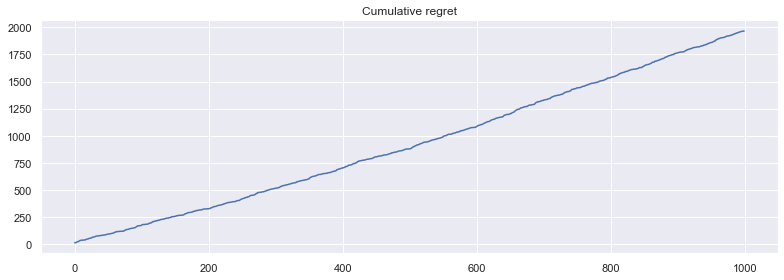

In [7]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

### NeuralUCB on quadratic rewards - h2

In [8]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)**2

In [9]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████████████████████████████████| 1000/1000 [00:25<00:00, 39.27it/s, total regret=956, % optimal arm=77.40%]


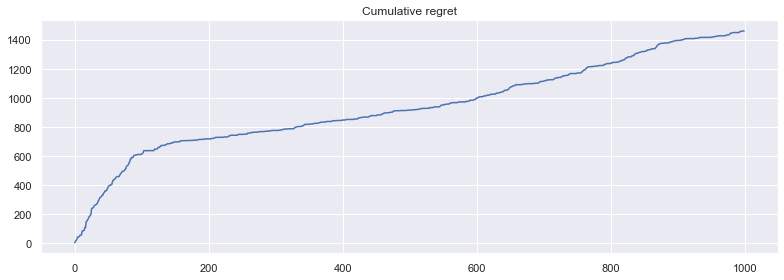

In [10]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

### NeuralUCB on nonlinear rewards - h3

In [11]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: np.cos(10*np.pi*np.dot(x, a))

In [12]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████████████████████████████████| 1000/1000 [00:27<00:00, 36.25it/s, total regret=770, % optimal arm=24.00%]


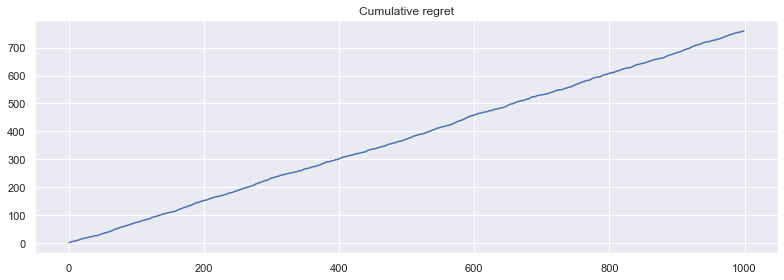

In [13]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()